# Problem Statement

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

## Data Description
Variable - Definition
1. ID - UniqueID
2. Estimated_Insects_Count - Estimated insects count per square meter
3. Crop_Type - Category of Crop(0,1)
4. Soil_Type - Category of Soil (0,1)
5. Pesticide_Use_Category - Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
6. Number_Doses_Week - Number of doses per week
7. Number_Weeks_Used - Number of weeks used
8. Number_Weeks_Quit - Number of weeks quit
9. Season - Season Category (1,2,3)
10. Crop_Damage - Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)


### sample_submission.csv

ID: Unique ID

Crop_Damage: Predicted Crop damage category for the test set 

In [1]:
# Loading relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# Loading data

train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')

In [3]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [5]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


Initial analysis -

1. There are missing values in 'Number_Weeks_Used'. Need to treat/ drop them.
2. Need to convert following features to OHE - 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season'

# EDA

In [8]:
# sns.countplot(x=train['ID']);
# Taking a lot of time. Let's look for unique values

train['ID'].nunique()

88858

C:\Users\neha.katla\AppData\Local\Temp\ipykernel_21696\2246301968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Estimated_Insects_Count'], kde=False);


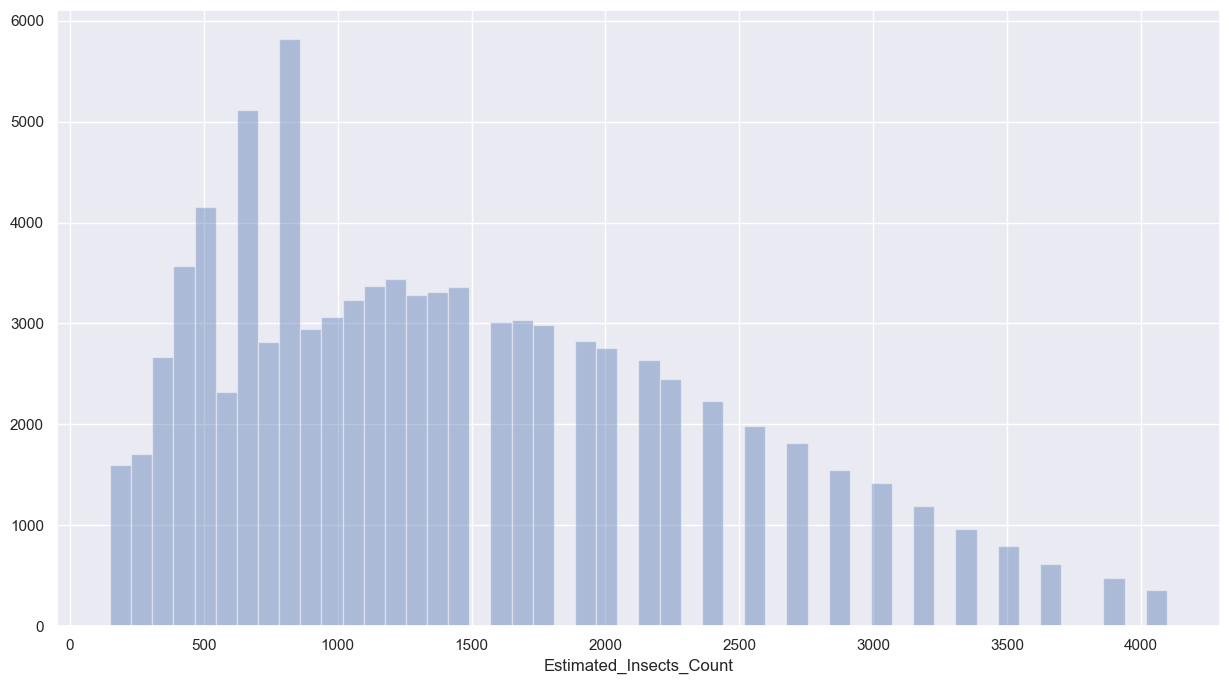

In [9]:
plt.figure(figsize=(15,8))
sns.distplot(train['Estimated_Insects_Count'], kde=False);

In [ ]:
sns.countplot(train['Crop_Type']);

In [ ]:
sns.countplot(train['Crop_Type'], hue=train['Crop_Damage']);

In [ ]:
sns.countplot(train['Soil_Type']);

In [ ]:
sns.countplot(train['Soil_Type'], hue=train['Crop_Damage']);

In [ ]:
sns.countplot(train['Pesticide_Use_Category']);

In [ ]:
sns.countplot(train['Pesticide_Use_Category'], hue=train['Crop_Damage']);

In [ ]:
sns.countplot(train['Season']);

In [ ]:
sns.countplot(train['Season'], hue=train['Crop_Damage']);

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(train['Number_Doses_Week'], kde=False);

Number of doses per week has some discrete values in multiples of 5s or 10s. There seems to be some outlier values above 60 

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(train['Number_Weeks_Used'], kde=False);

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(train['Number_Weeks_Quit'], kde=False);

In [ ]:
sns.countplot(train['Crop_Damage']);

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Estimated_Insects_Count', y='Number_Weeks_Used', data=train);

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y='Estimated_Insects_Count', x='Crop_Damage', data=train);

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True, cmap='viridis');

### Summary
1. We can drop ID
2. Shouldn't 'Number_Weeks_Used' be 52 (number of weeks in an year)? Or is it that farmers are using it for more than an year.

# Feature Engineering & Selection

In [ ]:
# Dropping ID column

train.drop('ID', axis=1, inplace=True)
test_final = test.drop('ID', axis=1)

Number of weeks quit is zero for about 30% of values. Let us create a new variable that captures if this number is zero or not

In [ ]:
a = np.array(train['Number_Weeks_Quit'])
train['Quit_Y_N'] = np.where(a==0,0,1)
train['Quit_Y_N'] = train['Quit_Y_N'].astype('str')

b = np.array(test['Number_Weeks_Quit'])
test_final['Quit_Y_N'] = np.where(b==0,0,1)
test_final['Quit_Y_N'] = test_final['Quit_Y_N'].astype('str')

In [ ]:
train.isnull().sum()

In [ ]:
#Imputing missing values using median

train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].median(), inplace=True)
test_final['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].median(), inplace=True)

In [ ]:
# Converting below features to object types so that we can apply one-hot encoding later

train['Pesticide_Use_Category'] = train['Pesticide_Use_Category'].astype(object)
train['Season'] = train['Season'].astype(object)
train['Crop_Type'] = train['Crop_Type'].astype(object)
train['Season'] = train['Season'].astype(object)

test_final['Pesticide_Use_Category'] = test_final['Pesticide_Use_Category'].astype(object)
test_final['Season'] = test_final['Season'].astype(object)
test_final['Crop_Type'] = test_final['Crop_Type'].astype(object)
test_final['Season'] = test_final['Season'].astype(object)

# Model training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = train.drop('Crop_Damage',axis=1)
y = train['Crop_Damage']

In [ ]:
#Encoding object variables

X = pd.get_dummies(X, drop_first=True)
test_final = pd.get_dummies(test_final, drop_first=True)

In [ ]:
X.head()

In [ ]:
test_final.head()

In [ ]:
#Scaling numeric variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
test_final = sc.transform(test_final)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state= 42)

In [ ]:
grid.best_params_

Best parameters came as {'learning_rate': 0.3, 'max_depth': 4, 'min_child_weight': 5}

In [ ]:
grid.best_score_

Best score - 0.8467779868758962

In [ ]:
xg = XGBClassifier(objective='multi:softprob', learning_rate=0.3, max_depth=4, min_weight_child=5)

In [ ]:
xg.fit(X_train, y_train)

In [ ]:
pred = xg.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))

In [ ]:
final_pred = xg.predict(test_final)

In [ ]:
sub = pd.DataFrame({"ID":test.ID.values})
sub["Crop_Damage"] =  final_pred
sub.to_csv("final_sub.csv", index=False)